# **Homework Assignment: Polynomial Kernel SVM in 3D Feature Space**
-------------------------------
Homework5: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Kos261/ML25/blob/main/Lab5/HW5.ipynb)



You have seen how a polynomial kernel of degree 2 can map the original 2D data
$$(x_1, x_2)$$
to a 3D feature space via some transformation
$$
\phi(\mathbf{x}).
$$
You also saw that **the decision boundary** in the 3D space—expected to be a hyperplane—**appears** as a circular surface when visualized.

## **Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space *not* look like a “flat” hyperplane,**
even though we *know* the classifier’s separating surface *is* mathematically linear in that space?

## **Secondary Question**

Explain **why** a hyperplane in 3D becomes a **circular (or elliptical) curve** when viewed back in the original 2D plane of the dataset.


# NOTES

$\phi(x)$ maps original $x\in\mathbb{R}^n$ features into higher-dimensional feature space to make it linearly separable. eg.:
$$ \phi(x_1,x_2) = (x_1^2, x_2^2, \sqrt{2}x_1 x_2, \sqrt{2}x_1, \sqrt{2}x_2,1)$$

Kernel function $K(\mathbb{x},\mathbb{z}) = (\mathbb{x}^T \mathbb{z} + c)^d$ let us compute dot product in the feature space without computing $\phi(x)$ directly. eg.:
$$ K(\mathbb{x},\mathbb{z}) = (\mathbb{x}^T \mathbb{z} + c)^2 $$


**Support Vector Machines (SVMs)** - the decision function for classifying a new point $x$ is:

$$f(x) = \text{sign}(w^T \phi(x) + b)$$


# ANSWER 1

In feature "$\phi(x)$" SVM space, decision line (specifically hyperplane) is linear combination of $\phi_i (x)$ .However those coordinates are **non-linear** functions of original features $x_1, x_2$. That's why in our original space with $xyz$ cooridnates hyperplane is curved

# ANSWER 2
Take decision function and calculate it by hand:
<!-- w1 x1^2 -->
$$ w_1 x_1^2 + w_2x_2^2 + w_3\sqrt{2}x_1x_2 + w_4\sqrt{2}x_1 + w_5\sqrt{2}x_2 + w_6 + b$$

We can choose weights such that $w'_3 = \frac{w_3}{\sqrt{2}}$ , $w'_4 = \frac{w_4 }{\sqrt{2}}$ , $w'_5 = \frac{w_5}{\sqrt{2}}$ and $w'_6 = w_6 + b$
Then we obtain:
$$ w_1 x_1^2 + w_2x_2^2 + w_3'x_1x_2 + w_4'x_1 + w_5'x_2 + w_6'$$

This is a general form of conic section equation. This is also hyperplane equation which is flat in "$\phi$" 6-dimensional space where it is flat, but we only see projection into 2-dimensional space. So we only see slice of conic section which is circle, ellipse or hyperbola. It's because it is decribed in nonlinear basis of $x_1, x_2$


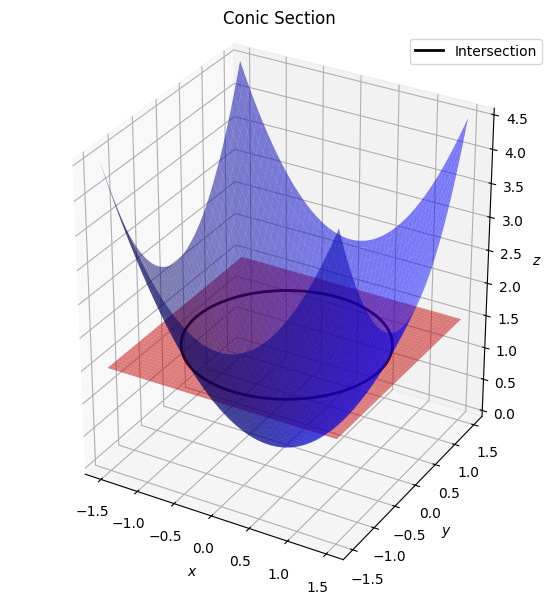

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
x, y = np.meshgrid(x, y)


z_conic = x**2 + y**2
z_plane = np.full_like(z_conic, 1.5)  # z = 1.5

theta = np.linspace(0, 2 * np.pi, 400)
r = np.sqrt(1.5)  # radius of circle at z = 1.5
x_circle = r * np.cos(theta)
y_circle = r * np.sin(theta)
z_circle = np.full_like(x_circle, 1.5)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z_conic, alpha=0.5, color='blue', edgecolor='none')
ax.plot_surface(x, y, z_plane, alpha=0.5, color='red', edgecolor='none')
ax.plot(x_circle, y_circle, z_circle, color='black', linewidth=2, label='Intersection')

# Labels and title
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Conic Section')
ax.legend()
ax.set_box_aspect([1, 1, 1.2])

plt.show()
